### Table of Contents:
* [1. Preparing the Data](#1)
* &emsp;[1.1. Importing Libraries](#11)
* [2. Data Cleaning](#2)
* &emsp;[2.1. Identifying Missing Values](#21)
* &emsp;[2.2. Dealing with Missing Values](#22)
* &emsp;[2.3. Removing Rows](#23)
* &emsp;[2.4. Finding Outliers](#24)
* &emsp;&emsp;[2.4.1. IQR Score Method](#241)
* &emsp;[2.5. Box Plot](#25)
* [3. Data Transformation](#3)
* &emsp;[3.1. Binning](#31)
* &emsp;[3.2. Normalization](#32)
* &emsp;&emsp;[3.2.1. Z-score Method](#33)
* [4. Results](#4)
* &emsp;[4.1. Data Cleaning](#41)
* &emsp;[4.2. Data Transformation](#42)

# 1. Preparing the Data <a class="anchor" id="1"></a>

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline  
plt.style.use('fivethirtyeight')

# 2. Data Cleaning <a class="anchor" id="2"></a>

## 2.1. Identifying Missing Values <a class="anchor" id="21"></a>

In [2]:
df = pd.read_csv('data/raw_training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','adult','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
target_features = ['isprofit','profitability_ratio']

In [4]:
df.shape # (# rows, # cols)

(881, 32)

In [5]:
df.head() # take a peak at the dataset

,Unnamed: 0,budget,company,country,director,genre,gross,name,rating,released,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,2643,150000000,Other,USA,Other,Animation,119436770,G-Force,PG,24.07.2009 00:00,...,G-Force,"A team of trained secret agent animals, guinea...",9.163791,The world needs bigger heroes,G-Force,"Fantasy, Action, Adventure, Family, Comedy",en,US,"dyr, duringcreditsstinger",2009
1,2644,18000000,Universal Pictures,USA,Other,Drama,22927390,Love Happens,PG-13,18.09.2009 00:00,...,Love Happens,Dr. Burke Ryan is a successful self-help autho...,10.279603,Sometimes when you least expect it...,Love Happens,"Drama, Romance",en,"CA, GB, US","hotel, florist, forest, grief, seminar, motiva...",2009
2,2645,40000000,Warner Bros.,USA,Other,Comedy,20916309,Shorts,PG,21.08.2009 00:00,...,Shorts,"A young boy's discovery of a colorful, wish-gr...",4.021983,Not So TALL Tales From The Director Of 'Spy Kids',Shorts,"Comedy, Family",en,"AE, US",NaN,2009
3,2646,19000000,Other,USA,Other,Crime,454149,Crossing Over,R,24.07.2009 00:00,...,Crossing Over,Immigrants from around the world enter Los Ang...,6.036408,Every day thousands of people illegally cross ...,Crossing Over,"Crime, Drama",en,US,"immigrant, los angeles",2009
4,2647,5000000,Other,USA,Other,Drama,1474508,The Joneses,R,23.04.2010 00:00,...,The Joneses,A seemingly perfect family moves into a suburb...,6.632194,"They're not just living the American dream, th...",The Joneses,"Comedy, Drama","cs, en, fr",US,"independent film, duringcreditsstinger",2010


In [6]:
del df['Unnamed: 0']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       881 non-null    int64  
 1   company                      881 non-null    object 
 2   country                      881 non-null    object 
 3   director                     881 non-null    object 
 4   genre                        881 non-null    object 
 5   gross                        881 non-null    int64  
 6   name                         881 non-null    object 
 7   rating                       881 non-null    object 
 8   released                     881 non-null    object 
 9   runtime                      881 non-null    int64  
 10  score                        881 non-null    float64
 11  star                         881 non-null    object 
 12  votes                        881 non-null    int64  
 13  writer              

In [8]:
df.isnull().sum()

budget                          0
company                         0
country                         0
director                        0
genre                           0
gross                           0
name                            0
rating                          0
released                        0
runtime                         0
score                           0
star                            0
votes                           0
writer                          0
year                            0
isprofit                        0
profitability_ratio             0
profitability_ratio_bucket      0
adult                           0
id                              0
imdb_id                         0
original_title                  0
overview                        0
popularity                      0
tagline                        68
title                           0
genres_edited                   0
spoken_languages_edited         1
production_countries_edited     3
keywords_edite

In [9]:
df.describe()   # before replacing zero with None

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,8.810000e+02,8.810000e+02,881.000000,881.000000,8.810000e+02,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,4.724455e+07,6.172019e+07,108.380250,6.479115,1.336446e+05,2008.225880,0.524404,1.068226,106.702611,139525.766175,13.635808,2012.936436
std,5.399046e+07,8.559695e+07,17.136074,0.946618,1.637022e+05,95.869407,0.499688,4.303748,430.420772,104771.340624,23.705926,2.207539
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999855,-100.000000,0.000000,0.000000,1997.000000
25%,1.000000e+07,8.008161e+06,98.000000,6.000000,3.372300e+04,2011.000000,0.000000,-0.554188,-60.000000,50348.000000,7.388933,2011.000000
50%,2.600000e+07,3.238122e+07,105.000000,6.500000,7.513800e+04,2013.000000,1.000000,0.062869,10.000000,92182.000000,10.289628,2013.000000
75%,6.000000e+07,8.036084e+07,117.000000,7.100000,1.691890e+05,2015.000000,1.000000,1.025015,100.000000,232679.000000,14.046164,2015.000000
max,2.500000e+08,9.366622e+08,180.000000,8.800000,1.629342e+06,2016.000000,1.000000,70.015925,7000.000000,404378.000000,547.488298,2017.000000


## 2.2. Dealing with Missing Values <a class="anchor" id="22"></a>

By observing the data, we see that only the following columns need initial transformation to replace zeros with the value None:
* overview
* tagline
* spoken_languages_edited
* production_countries_edited
* keywords_edited

And the remaining features do not have to change since they do not contain zero values.

In [10]:
df['overview'] = df['overview'].map(lambda x:x if x != 0 else None)
df['tagline'] = df['tagline'].map(lambda x:x if x != 0 else None)
df['spoken_languages_edited'] = df['spoken_languages_edited'].map(lambda x:x if x != 0 else None)
df['production_countries_edited'] = df['production_countries_edited'].map(lambda x:x if x != 0 else None)
df['keywords_edited'] = df['keywords_edited'].map(lambda x:x if x != 0 else None)

In [11]:
df.head()   # take a peak at the dataset

,budget,company,country,director,genre,gross,name,rating,released,runtime,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,150000000,Other,USA,Other,Animation,119436770,G-Force,PG,24.07.2009 00:00,88,...,G-Force,"A team of trained secret agent animals, guinea...",9.163791,The world needs bigger heroes,G-Force,"Fantasy, Action, Adventure, Family, Comedy",en,US,"dyr, duringcreditsstinger",2009
1,18000000,Universal Pictures,USA,Other,Drama,22927390,Love Happens,PG-13,18.09.2009 00:00,100,...,Love Happens,Dr. Burke Ryan is a successful self-help autho...,10.279603,Sometimes when you least expect it...,Love Happens,"Drama, Romance",en,"CA, GB, US","hotel, florist, forest, grief, seminar, motiva...",2009
2,40000000,Warner Bros.,USA,Other,Comedy,20916309,Shorts,PG,21.08.2009 00:00,89,...,Shorts,"A young boy's discovery of a colorful, wish-gr...",4.021983,Not So TALL Tales From The Director Of 'Spy Kids',Shorts,"Comedy, Family",en,"AE, US",NaN,2009
3,19000000,Other,USA,Other,Crime,454149,Crossing Over,R,24.07.2009 00:00,113,...,Crossing Over,Immigrants from around the world enter Los Ang...,6.036408,Every day thousands of people illegally cross ...,Crossing Over,"Crime, Drama",en,US,"immigrant, los angeles",2009
4,5000000,Other,USA,Other,Drama,1474508,The Joneses,R,23.04.2010 00:00,96,...,The Joneses,A seemingly perfect family moves into a suburb...,6.632194,"They're not just living the American dream, th...",The Joneses,"Comedy, Drama","cs, en, fr",US,"independent film, duringcreditsstinger",2010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       881 non-null    int64  
 1   company                      881 non-null    object 
 2   country                      881 non-null    object 
 3   director                     881 non-null    object 
 4   genre                        881 non-null    object 
 5   gross                        881 non-null    int64  
 6   name                         881 non-null    object 
 7   rating                       881 non-null    object 
 8   released                     881 non-null    object 
 9   runtime                      881 non-null    int64  
 10  score                        881 non-null    float64
 11  star                         881 non-null    object 
 12  votes                        881 non-null    int64  
 13  writer              

In [13]:
df.isnull().sum()

budget                          0
company                         0
country                         0
director                        0
genre                           0
gross                           0
name                            0
rating                          0
released                        0
runtime                         0
score                           0
star                            0
votes                           0
writer                          0
year                            0
isprofit                        0
profitability_ratio             0
profitability_ratio_bucket      0
adult                           0
id                              0
imdb_id                         0
original_title                  0
overview                        0
popularity                      0
tagline                        68
title                           0
genres_edited                   0
spoken_languages_edited         1
production_countries_edited     3
keywords_edite

In [14]:
df.describe()   # after replacing zero with None

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,8.810000e+02,8.810000e+02,881.000000,881.000000,8.810000e+02,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,4.724455e+07,6.172019e+07,108.380250,6.479115,1.336446e+05,2008.225880,0.524404,1.068226,106.702611,139525.766175,13.635808,2012.936436
std,5.399046e+07,8.559695e+07,17.136074,0.946618,1.637022e+05,95.869407,0.499688,4.303748,430.420772,104771.340624,23.705926,2.207539
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999855,-100.000000,0.000000,0.000000,1997.000000
25%,1.000000e+07,8.008161e+06,98.000000,6.000000,3.372300e+04,2011.000000,0.000000,-0.554188,-60.000000,50348.000000,7.388933,2011.000000
50%,2.600000e+07,3.238122e+07,105.000000,6.500000,7.513800e+04,2013.000000,1.000000,0.062869,10.000000,92182.000000,10.289628,2013.000000
75%,6.000000e+07,8.036084e+07,117.000000,7.100000,1.691890e+05,2015.000000,1.000000,1.025015,100.000000,232679.000000,14.046164,2015.000000
max,2.500000e+08,9.366622e+08,180.000000,8.800000,1.629342e+06,2016.000000,1.000000,70.015925,7000.000000,404378.000000,547.488298,2017.000000


## 2.3. Removing Rows <a class="anchor" id="23"></a>

In [15]:
data_dropped = df.dropna()

In [16]:
data_dropped = data_dropped.reset_index() 
del data_dropped['index']

In [17]:
data_dropped.shape

(788, 31)

In [18]:
df.shape

(881, 31)

In [19]:
num_rows_lost = round(100*(df.shape[0] - data_dropped.shape[0])/float(df.shape[0]))

In [20]:
template = 'retained {}% of rows'
template.format(num_rows_lost)

'retained 11% of rows'

In [21]:
# class distribution
class_counts = data_dropped.groupby('isprofit').size()
class_counts

isprofit
0    367
1    421
dtype: int64

In [22]:
class_counts[0]/df['isprofit'].size

0.41657207718501704

In [23]:
df['isprofit'].value_counts(normalize=True)   #  split of trues and falses before rows dropped

1    0.524404
0    0.475596
Name: isprofit, dtype: float64

In [24]:
data_dropped['isprofit'].value_counts(normalize=True)   #  split of trues and falses after rows dropped

1    0.534264
0    0.465736
Name: isprofit, dtype: float64

In [25]:
data_dropped.describe()   # after removing rows which include NaN

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,7.880000e+02,7.880000e+02,788.000000,788.000000,7.880000e+02,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,5.013817e+07,6.571725e+07,108.695431,6.491878,1.430980e+05,2007.652284,0.534264,1.117309,111.598985,136392.461929,14.198365,2012.880711
std,5.546815e+07,8.866001e+07,17.264108,0.958734,1.694700e+05,101.357738,0.499141,4.468288,446.875323,103540.737365,24.836518,2.208562
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999822,-100.000000,0.000000,0.000000,1997.000000
25%,1.200000e+07,1.064026e+07,98.000000,6.000000,3.675250e+04,2011.000000,0.000000,-0.507735,-50.000000,49520.750000,7.662285,2011.000000
50%,3.000000e+07,3.609237e+07,106.000000,6.600000,8.112850e+04,2013.000000,1.000000,0.076401,10.000000,87826.500000,10.682358,2013.000000
75%,6.500000e+07,8.445162e+07,117.000000,7.100000,1.863975e+05,2015.000000,1.000000,0.971079,100.000000,228196.250000,14.423023,2015.000000
max,2.500000e+08,9.366622e+08,180.000000,8.800000,1.629342e+06,2016.000000,1.000000,70.015925,7000.000000,404378.000000,547.488298,2017.000000


In [26]:
# % change in means of columns before and after dropping missing-value rows
change_in_means = ((data_dropped.mean() - df.mean()) / df.mean() * 100).round(2)
change_in_means

budget                        6.12
gross                         6.48
runtime                       0.29
score                         0.20
votes                         7.07
year                         -0.03
isprofit                      1.88
profitability_ratio           4.59
profitability_ratio_bucket    4.59
id                           -2.25
popularity                    4.13
year_released                -0.00
dtype: float64

### Bar Chart of the Change in Means

Text(0, 0.5, '% change')

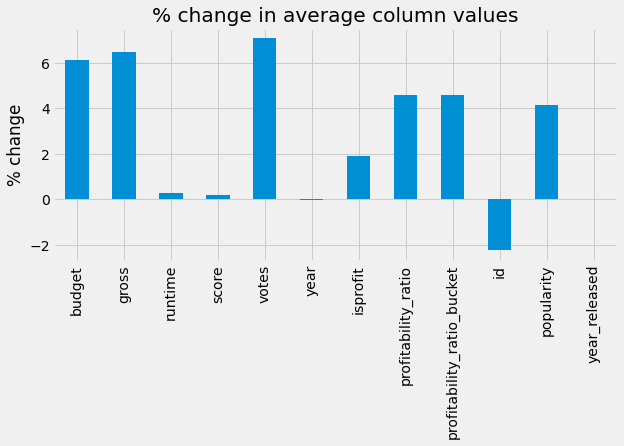

In [27]:
plt.figure(figsize=(9, 4))
change_in_means.plot.bar(title='% change in average column values')
plt.ylabel('% change')


Figure 1: Percent change in average column values
<p>Figure 1 shows the percent change in mean of columns before and after dropping missing-value rows.</p>

## 2.4. Finding Outliers <a class="anchor" id="24"></a>

### 2.4.1. IQR Score Method <a class="anchor" id="241"></a>

In [28]:
Q1 = data_dropped.quantile(0.25)
Q3 = data_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                        5.300000e+07
gross                         7.381136e+07
runtime                       1.900000e+01
score                         1.100000e+00
votes                         1.496450e+05
year                          4.000000e+00
isprofit                      1.000000e+00
profitability_ratio           1.478814e+00
profitability_ratio_bucket    1.500000e+02
id                            1.786755e+05
popularity                    6.760738e+00
year_released                 4.000000e+00
dtype: float64


In [29]:
print((data_dropped < (Q1 - (1.5 * IQR))) | (data_dropped > (Q3 + (1.5 * IQR))))

     adult  budget  company  country  director  genre  genres_edited  gross  \
0    False    True    False    False     False  False          False  False   
1    False   False    False    False     False  False          False  False   
2    False   False    False    False     False  False          False  False   
3    False   False    False    False     False  False          False  False   
4    False   False    False    False     False  False          False  False   
..     ...     ...      ...      ...       ...    ...            ...    ...   
783  False   False    False    False     False  False          False  False   
784  False   False    False    False     False  False          False  False   
785  False   False    False    False     False  False          False  False   
786  False   False    False    False     False  False          False  False   
787  False   False    False    False     False  False          False  False   

        id  imdb_id  ...  runtime  score  spoken_la

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [30]:
data_dropped.shape

(788, 31)

In [31]:
data_dropped_outlier_IQR = data_dropped[~((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [32]:
data_dropped_outlier_IQR.shape

(561, 31)

In [33]:
data_dropped_outlier_IQR = data_dropped_outlier_IQR.reset_index()
del data_dropped_outlier_IQR['index']
data_dropped_outlier_IQR

,budget,company,country,director,genre,gross,name,rating,released,runtime,...,original_title,overview,popularity,tagline,title,genres_edited,spoken_languages_edited,production_countries_edited,keywords_edited,year_released
0,18000000,Universal Pictures,USA,Other,Drama,22927390,Love Happens,PG-13,18.09.2009 00:00,100,...,Love Happens,Dr. Burke Ryan is a successful self-help autho...,10.279603,Sometimes when you least expect it...,Love Happens,"Drama, Romance",en,"CA, GB, US","hotel, florist, forest, grief, seminar, motiva...",2009
1,19000000,Other,USA,Other,Crime,454149,Crossing Over,R,24.07.2009 00:00,113,...,Crossing Over,Immigrants from around the world enter Los Ang...,6.036408,Every day thousands of people illegally cross ...,Crossing Over,"Crime, Drama",en,US,"immigrant, los angeles",2009
2,5000000,Other,USA,Other,Drama,1474508,The Joneses,R,23.04.2010 00:00,96,...,The Joneses,A seemingly perfect family moves into a suburb...,6.632194,"They're not just living the American dream, th...",The Joneses,"Comedy, Drama","cs, en, fr",US,"independent film, duringcreditsstinger",2010
3,70000000,Metro-Goldwyn-Mayer (MGM),USA,Other,Adventure,35922978,The Pink Panther 2,PG,6.02.2009 00:00,92,...,The Pink Panther 2,When legendary treasures from around the world...,18.546750,Inspect the unexpected.,The Pink Panther 2,"Comedy, Mystery",en,US,"diamond, clouseau, pink panther",2009
4,65000000,Other,Other,Other,Animation,19548064,Astro Boy,PG,23.10.2009 00:00,94,...,Astro Boy,"Set in futuristic Metro City, Astro Boy is abo...",13.293466,Have a blast.,Astro Boy,"Animation, Action, Family, Science Fiction",en,"HK, JP, US",superhero,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,17000000,Other,USA,Other,Comedy,41715860,Almost Christmas,PG-13,11.11.2016 00:00,111,...,Almost Christmas,A dysfunctional family gathers together for th...,7.288877,Five days together? Oh joy.,Almost Christmas,"Comedy, Drama",en,US,"thanksgiving, family, death, christmas",2016
557,5000000,Other,USA,Other,Horror,4790573,Incarnate,PG-13,2.12.2016 00:00,91,...,Incarnate,An exorcist comes up against an evil from his ...,15.909181,Faith Has Failed Us,Incarnate,"Horror, Thriller",en,US,"new york, vatican, dutch, wheelchair, exorcism...",2016
558,4000000,Other,USA,Other,Horror,10732841,The Darkness,PG-13,13.05.2016 00:00,92,...,The Darkness,A family returns from a Grand Canyon vacation ...,12.187189,Evil comes home,The Darkness,"Horror, Thriller",en,US,"self sacrifice, snake, autism, bulimia, haunte...",2016
559,8500000,Other,USA,Other,Animation,19985196,Middle School: The Worst Years of My Life,PG,7.10.2016 00:00,92,...,Middle School: The Worst Years of My Life,A quiet teenage artist Rafe Katchadorian has a...,10.222143,Rules aren't for everyone,Middle School: The Worst Years of My Life,"Family, Comedy","pt, en, hu",US,"middle school, based on children's book",2016


In [34]:
data_dropped_outlier_IQR.describe()

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3.553318e+07,3.639691e+07,106.310160,6.434046,89941.477718,2012.677362,0.440285,0.072438,7.122995,140261.643494,10.275457,2012.860963
std,3.177292e+07,3.887071e+07,12.659555,0.740246,82383.499500,2.104673,0.496864,0.938483,94.024128,105634.367037,3.929700,2.102361
min,5.000000e+04,1.098000e+03,76.000000,4.400000,2558.000000,2009.000000,0.000000,-0.999822,-100.000000,189.000000,0.393865,2009.000000
25%,1.200000e+07,6.002756e+06,98.000000,6.000000,32345.000000,2011.000000,0.000000,-0.664760,-70.000000,49017.000000,7.363527,2011.000000
50%,2.500000e+07,2.513223e+07,104.000000,6.500000,64524.000000,2013.000000,0.000000,-0.149826,-10.000000,89691.000000,9.785895,2013.000000
75%,5.000000e+07,5.269854e+07,114.000000,7.000000,117034.000000,2015.000000,1.000000,0.509540,50.000000,239678.000000,12.565896,2015.000000
max,1.400000e+08,1.917193e+08,142.000000,8.200000,404796.000000,2016.000000,1.000000,3.148541,310.000000,404378.000000,24.483893,2017.000000


## 2.5. Box Plot <a class="anchor" id="25"></a>

### Boxplot of Initial Data

<AxesSubplot:>

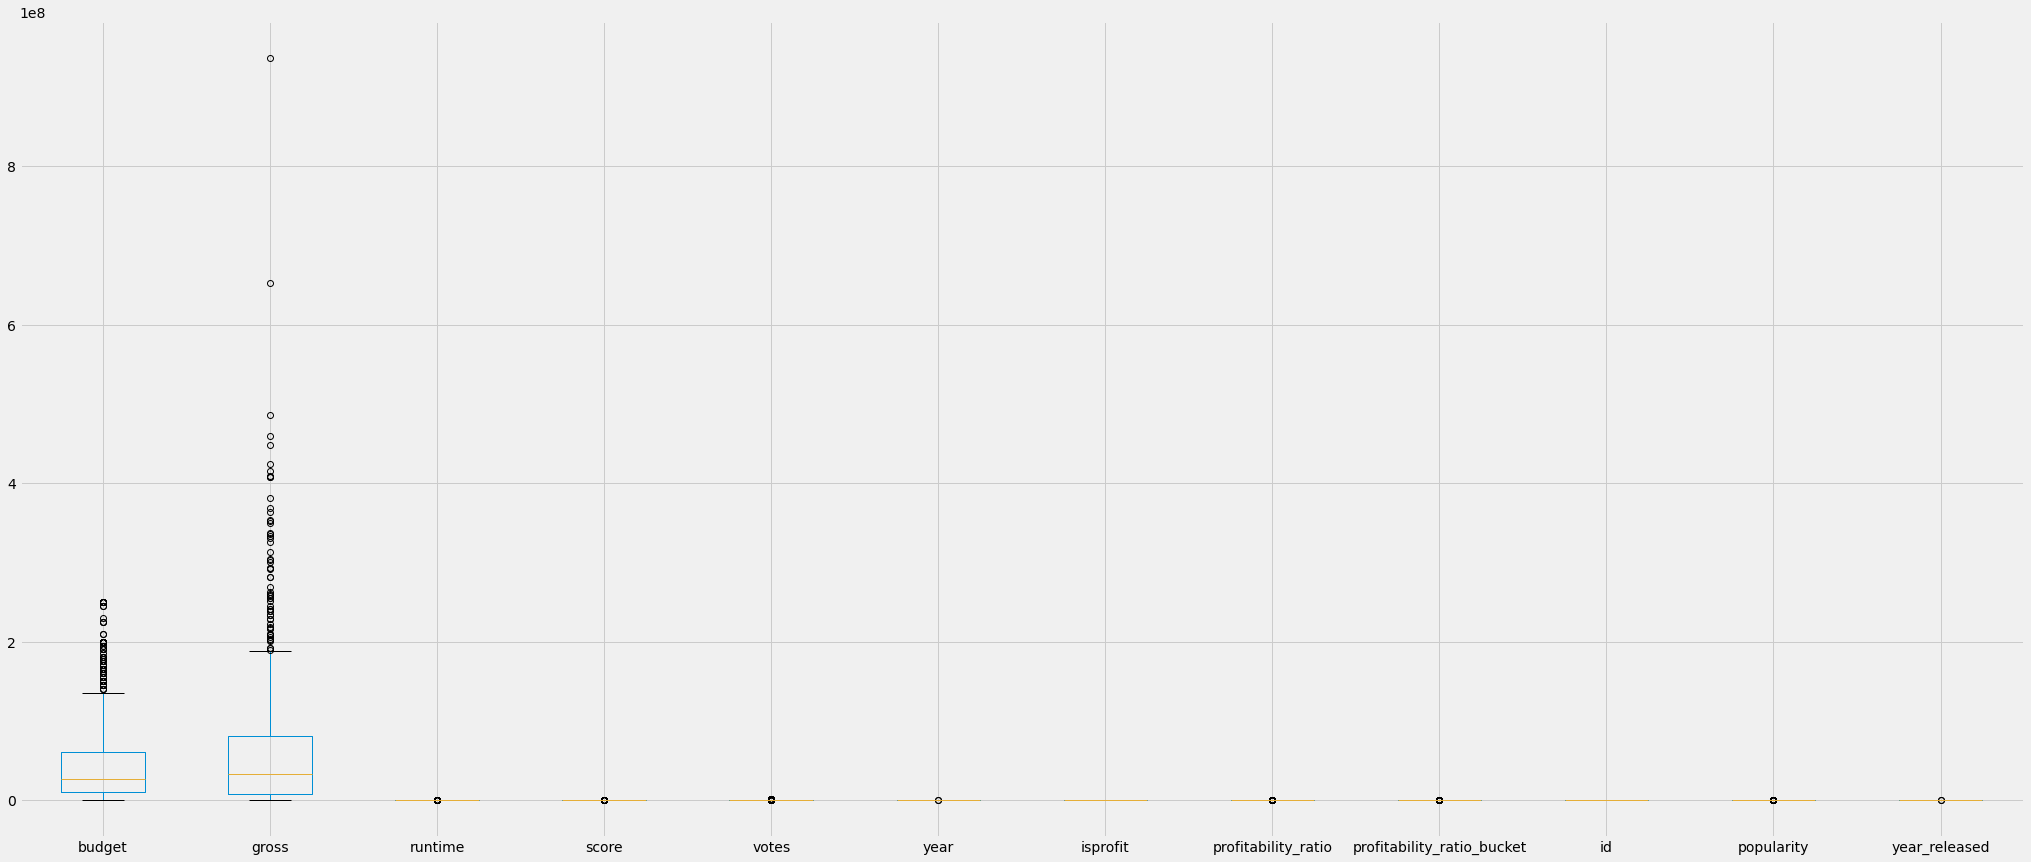

In [35]:
df.plot(x=df.index.name, kind='box', figsize=(32, 14))

Figure 2: Data Distribution before Cleaning
<p>Figure 2 shows the distribution of the data before dropping rows. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Data

<AxesSubplot:>

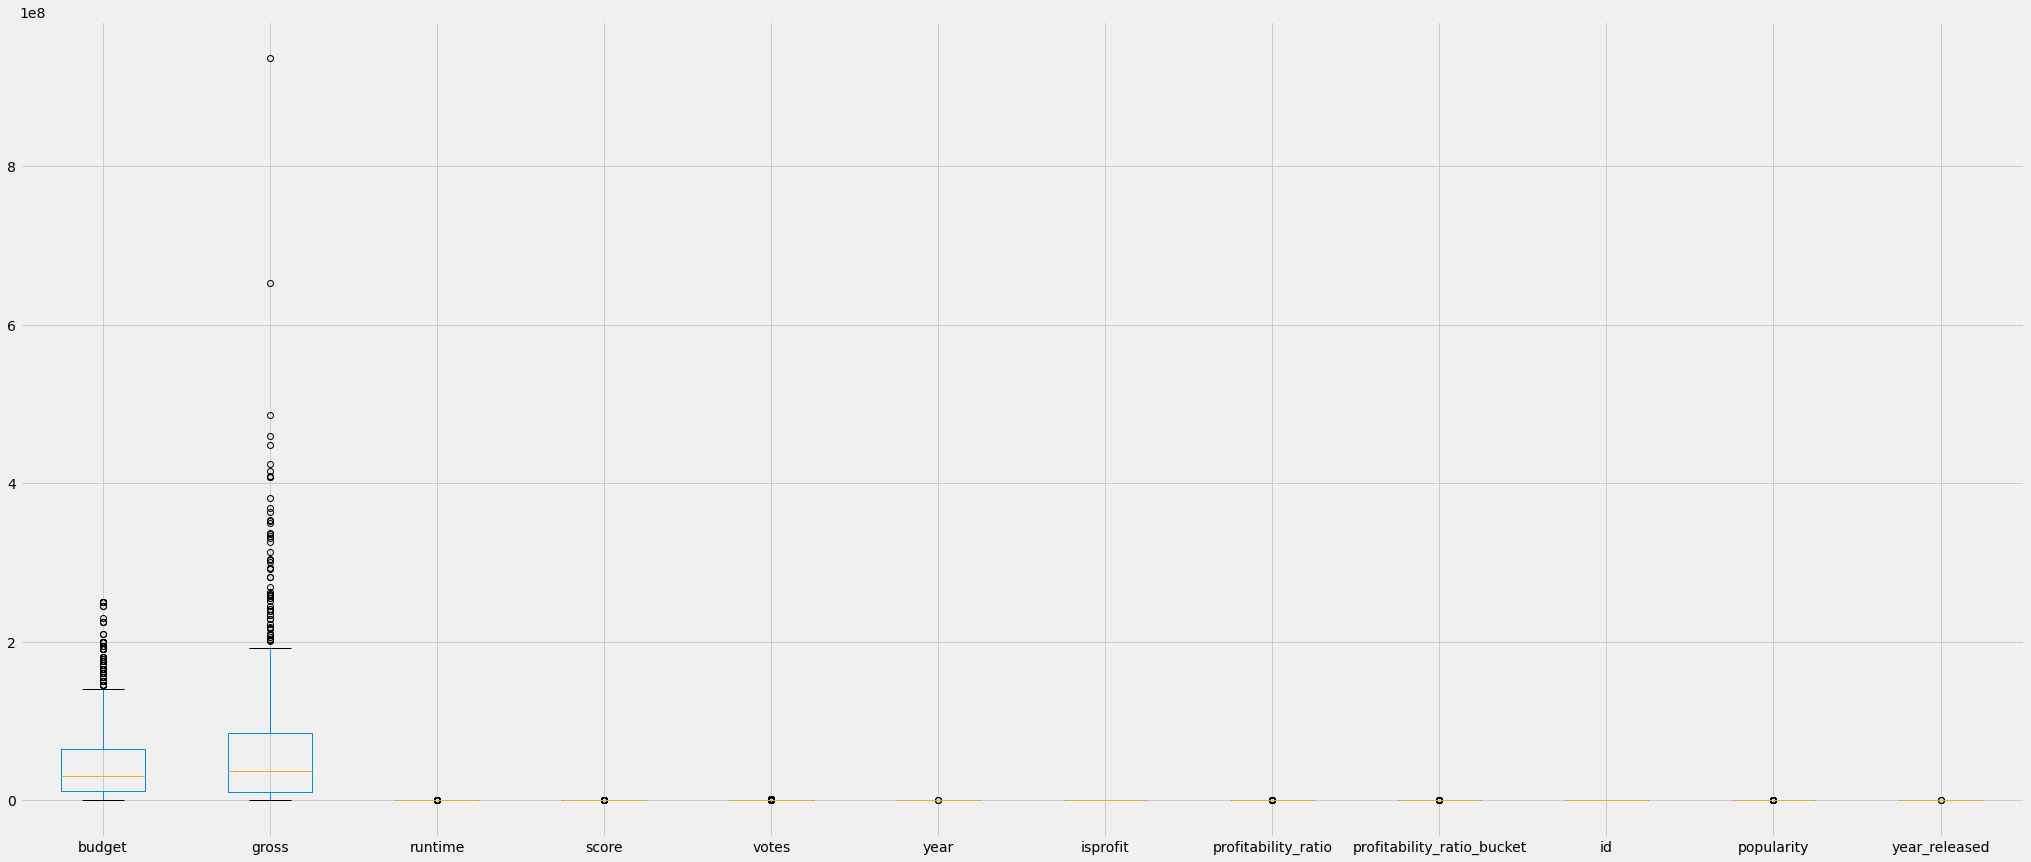

In [36]:
data_dropped.plot(x=data_dropped.index.name, kind='box', figsize=(32, 14))

Figure 3: Data Distribution of Dropped Data
<p>Figure 3 shows the distibution of data after dropping rows with the value NaN. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Outlier Data

<AxesSubplot:>

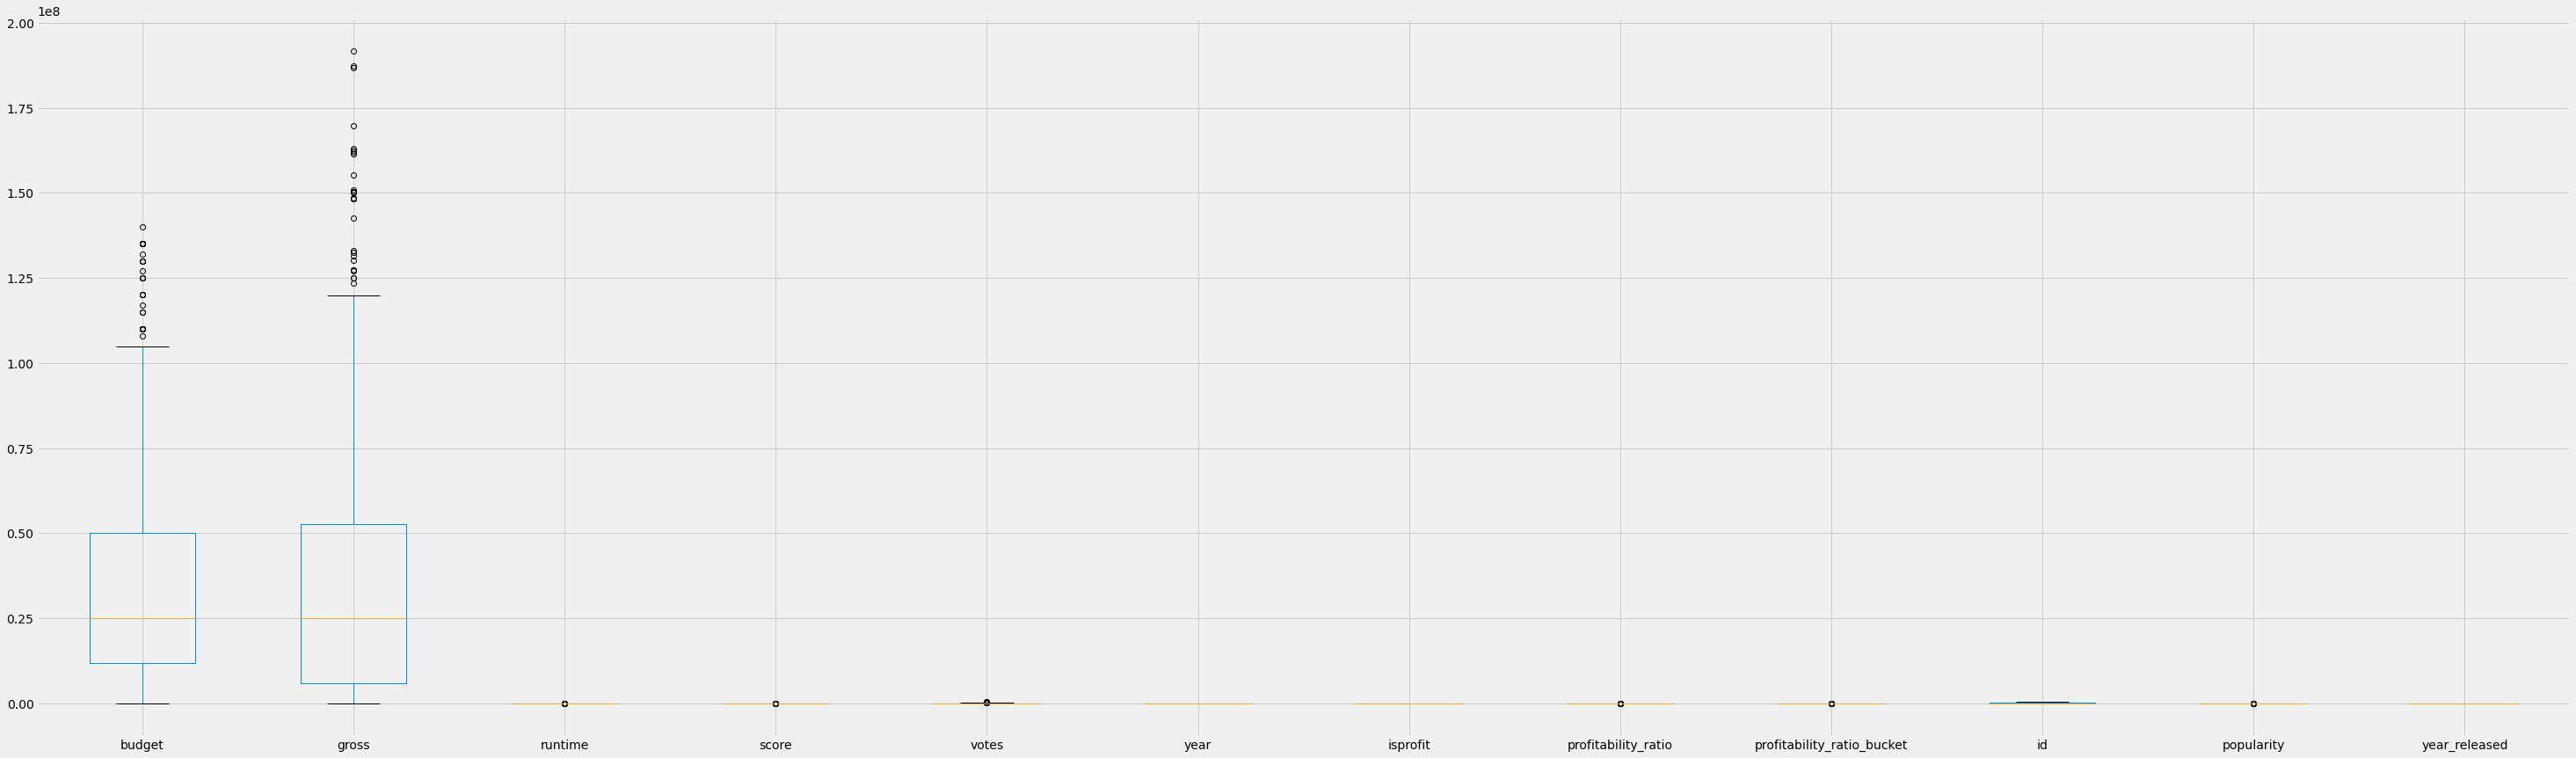

In [37]:
data_dropped_outlier_IQR.plot(x=data_dropped_outlier_IQR.index.name, kind='box', figsize=(46, 14))

Figure 4: Data Distribution of Outlier Data
<p>Figure 4 shows the distributoion of data after dropping outliers. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

# 3. Data Transformation <a class="anchor" id="3"></a>

Our data has the following columns that we can perform transformation on:
* budget
* runtime
* score
* votes
* popularity

<p>
> We want to discretize and normalize the data so it will be ready for the modeling stage.
<br><br>
> After writing some general functions, we will perform the transformations one by one.
</p>

## 3.1. Binning <a class="anchor" id="31"></a>

Below, we iterate over all continuous features and use binning to discretize the data. At the end, we summarize the results by indicating the 4 intervals that our data was partitioned into.

In [38]:
for i in continuous_features:
    display(data_dropped_outlier_IQR[i].describe())

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4))

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4).value_counts())

count    5.610000e+02
mean     3.553318e+07
std      3.177292e+07
min      5.000000e+04
25%      1.200000e+07
50%      2.500000e+07
75%      5.000000e+07
max      1.400000e+08
Name: budget, dtype: float64

0       (12000000.0, 25000000.0]
1       (12000000.0, 25000000.0]
2        (49999.999, 12000000.0]
3      (50000000.0, 140000000.0]
4      (50000000.0, 140000000.0]
                 ...            
556     (12000000.0, 25000000.0]
557      (49999.999, 12000000.0]
558      (49999.999, 12000000.0]
559      (49999.999, 12000000.0]
560      (49999.999, 12000000.0]
Name: budget, Length: 561, dtype: category
Categories (4, interval[float64]): [(49999.999, 12000000.0] < (12000000.0, 25000000.0] < (25000000.0, 50000000.0] < (50000000.0, 140000000.0]]

(49999.999, 12000000.0]      154
(25000000.0, 50000000.0]     152
(50000000.0, 140000000.0]    128
(12000000.0, 25000000.0]     127
Name: budget, dtype: int64

count    561.000000
mean     106.310160
std       12.659555
min       76.000000
25%       98.000000
50%      104.000000
75%      114.000000
max      142.000000
Name: runtime, dtype: float64

0       (98.0, 104.0]
1      (104.0, 114.0]
2      (75.999, 98.0]
3      (75.999, 98.0]
4      (75.999, 98.0]
            ...      
556    (104.0, 114.0]
557    (75.999, 98.0]
558    (75.999, 98.0]
559    (75.999, 98.0]
560    (75.999, 98.0]
Name: runtime, Length: 561, dtype: category
Categories (4, interval[float64]): [(75.999, 98.0] < (98.0, 104.0] < (104.0, 114.0] < (114.0, 142.0]]

(75.999, 98.0]    152
(104.0, 114.0]    145
(114.0, 142.0]    135
(98.0, 104.0]     129
Name: runtime, dtype: int64

count    561.000000
mean       6.434046
std        0.740246
min        4.400000
25%        6.000000
50%        6.500000
75%        7.000000
max        8.200000
Name: score, dtype: float64

0      (4.399, 6.0]
1        (6.5, 7.0]
2        (6.0, 6.5]
3      (4.399, 6.0]
4        (6.0, 6.5]
           ...     
556    (4.399, 6.0]
557    (4.399, 6.0]
558    (4.399, 6.0]
559      (6.0, 6.5]
560      (6.0, 6.5]
Name: score, Length: 561, dtype: category
Categories (4, interval[float64]): [(4.399, 6.0] < (6.0, 6.5] < (6.5, 7.0] < (7.0, 8.2]]

(4.399, 6.0]    154
(6.0, 6.5]      150
(6.5, 7.0]      132
(7.0, 8.2]      125
Name: score, dtype: int64

count       561.000000
mean      89941.477718
std       82383.499500
min        2558.000000
25%       32345.000000
50%       64524.000000
75%      117034.000000
max      404796.000000
Name: votes, dtype: float64

0      (2557.999, 32345.0]
1      (2557.999, 32345.0]
2       (32345.0, 64524.0]
3       (32345.0, 64524.0]
4      (2557.999, 32345.0]
              ...         
556    (2557.999, 32345.0]
557    (2557.999, 32345.0]
558    (2557.999, 32345.0]
559    (2557.999, 32345.0]
560     (32345.0, 64524.0]
Name: votes, Length: 561, dtype: category
Categories (4, interval[float64]): [(2557.999, 32345.0] < (32345.0, 64524.0] < (64524.0, 117034.0] < (117034.0, 404796.0]]

(2557.999, 32345.0]     141
(32345.0, 64524.0]      140
(64524.0, 117034.0]     140
(117034.0, 404796.0]    140
Name: votes, dtype: int64

count    561.000000
mean      10.275457
std        3.929700
min        0.393865
25%        7.363527
50%        9.785895
75%       12.565896
max       24.483893
Name: popularity, dtype: float64

0       (9.786, 12.566]
1        (0.393, 7.364]
2        (0.393, 7.364]
3      (12.566, 24.484]
4      (12.566, 24.484]
             ...       
556      (0.393, 7.364]
557    (12.566, 24.484]
558     (9.786, 12.566]
559     (9.786, 12.566]
560      (0.393, 7.364]
Name: popularity, Length: 561, dtype: category
Categories (4, interval[float64]): [(0.393, 7.364] < (7.364, 9.786] < (9.786, 12.566] < (12.566, 24.484]]

(0.393, 7.364]      141
(7.364, 9.786]      140
(9.786, 12.566]     140
(12.566, 24.484]    140
Name: popularity, dtype: int64

## 3.2. Normalization <a class="anchor" id="32"></a>

### 3.2.1. Z-score Method <a class="anchor" id="321"></a>

In [39]:
data_dropped_outlier_IQR[continuous_features].describe()

,budget,runtime,score,votes,popularity
count,5.610000e+02,561.000000,561.000000,561.000000,561.000000
mean,3.553318e+07,106.310160,6.434046,89941.477718,10.275457
std,3.177292e+07,12.659555,0.740246,82383.499500,3.929700
min,5.000000e+04,76.000000,4.400000,2558.000000,0.393865
25%,1.200000e+07,98.000000,6.000000,32345.000000,7.363527
50%,2.500000e+07,104.000000,6.500000,64524.000000,9.785895
75%,5.000000e+07,114.000000,7.000000,117034.000000,12.565896
max,1.400000e+08,142.000000,8.200000,404796.000000,24.483893


In [40]:
scaler = StandardScaler()

In [41]:
data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(data_dropped_outlier_IQR[continuous_features]), columns=continuous_features)

In [42]:
data_dropped_z_score_scaled.describe()

,budget,runtime,score,votes,popularity
count,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02
mean,-6.966105e-17,-1.709862e-16,5.351235e-16,2.533129e-17,-1.266565e-16
std,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00,1.000892e+00
min,-1.117771e+00,-2.396388e+00,-2.750251e+00,-1.061638e+00,-2.516836e+00
25%,-7.413290e-01,-6.570197e-01,-5.868777e-01,-6.997503e-01,-7.416670e-01
50%,-3.318104e-01,-1.826464e-01,8.917649e-02,-3.088017e-01,-1.246912e-01
75%,4.557255e-01,6.079757e-01,7.652307e-01,3.291521e-01,5.833735e-01
max,3.290855e+00,2.821718e+00,2.387761e+00,3.825226e+00,3.618881e+00


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'isprofit'}>,
        <AxesSubplot:title={'center':'profitability_ratio'}>,
        <AxesSubplot:title={'center':'profitability_ratio_bucket'}>],
       [<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year_released'}>]], dtype=object)

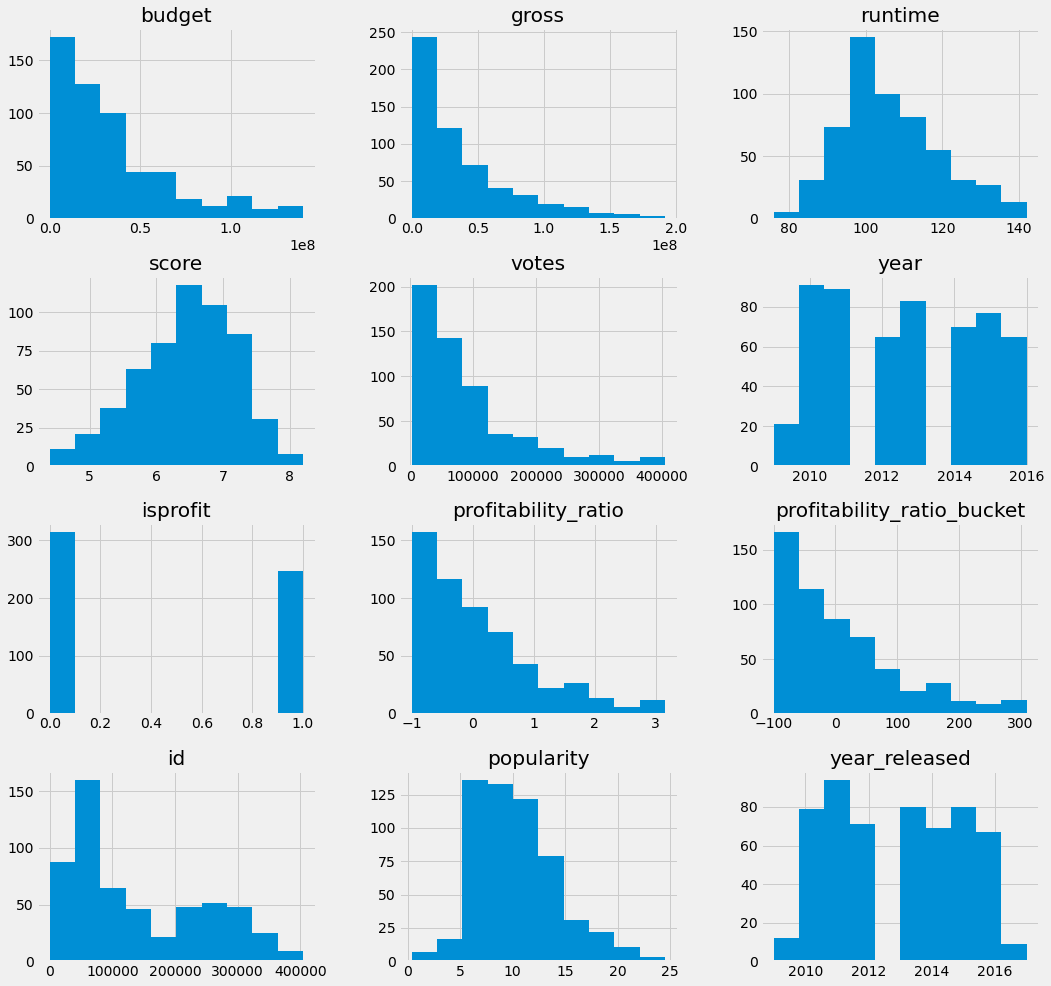

In [43]:
data_dropped_outlier_IQR.hist(figsize=(16, 16))

Figure 6: Histogram of Data Before Normalization
<p>Figure 6 shows the bar charts helping us visualize the data befor the five features above have been normalized.</p>

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>]],
      dtype=object)

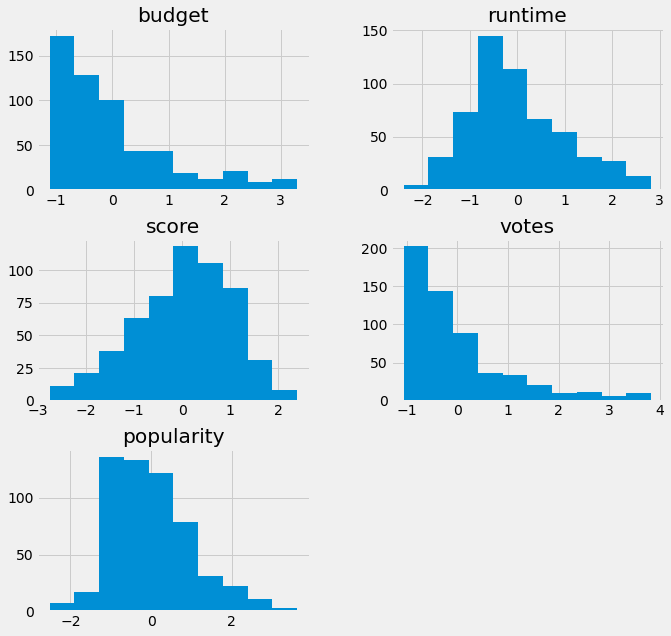

In [44]:
data_dropped_z_score_scaled.hist(figsize=(10, 10))

Figure 7: Histogram of Data After Normalization
<p>Figure 7 shows bar charts helping us visualize the data after the five features above have been normalized.</p>

Add normalized columns to main dataset as new columns labeled with the feature name they relate to followed by "_norm".

In [45]:
norm_column_names = ['budget_norm', 'runtime_norm', 'score_norm', 'votes_norm', 'popularity_norm']
    
for i, j in zip(norm_column_names, continuous_features):
    data_dropped_outlier_IQR[i] = pd.Series(data_dropped_z_score_scaled[j])


In [46]:
data_dropped_outlier_IQR.to_csv('data/training_data.csv')

# 4. Results <a class="anchor" id="4"></a>

## 4.1. Data Cleaning <a class="anchor" id="41"></a>

As we analyze all the features in <a href="#21">Section 2.1.</a> we can see that the only features that need cleaning are overview, tagline, spoken_languages_edited, production_countries_edited and keywords_edited. The rest of the features are clean meaning not missing any values that require either dropping or replacement of those values.

## 4.2. Data Transformation <a class="anchor" id="42"></a>

After analyzing and cleaning the five categorical features found in <a href="#21">Section 2.1.</a> we are able to focus on transforming our data.  

<p>Our data includes categorical and continuous types but for transformation we want to focus on five that need to be discretized and normalized in order to be ready for modeling. These five features include budget, runtime, score, votes and popularity. The reason for discretizing the data is so we can partition the data into equal distributions that will be easier to manage and manipulate. After that we can use normalization to give all the attributes an equal weight which is useful to us in the following section where we model our data.</p>